In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
df=pd.read_csv("sv.csv")
df.head()

,WindSpeed,Power
0,15.17,2051.23
1,12.44,1945.25
2,13.98,1980.63
3,13.94,2070.12
4,14.94,2165.41


In [3]:
df.describe()

,WindSpeed,Power
count,1399.000000,1399.000000
mean,7.592102,763.730465
std,4.408039,759.963262
min,0.350000,0.000000
25%,4.165000,88.595000
50%,6.280000,441.400000
75%,11.525000,1532.355000
max,19.580000,2376.970000


In [4]:
x=df.iloc[:,0:1].values

In [5]:
x

array([[15.17],
       [12.44],
       [13.98],
       ...,
       [ 3.05],
       [ 2.62],
       [ 2.65]])

In [6]:
y=df.iloc[:,1:2].values

In [7]:
y

array([[2051.23],
       [1945.25],
       [1980.63],
       ...,
       [   0.  ],
       [   0.  ],
       [   0.  ]])

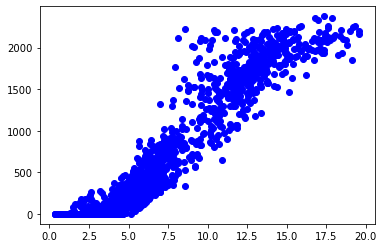

In [8]:
plt.scatter(x,y,color='blue')

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()

In [13]:
model.fit(x_train,y_train)

LinearRegression()

In [14]:
y_pred=model.predict(x_test)

In [15]:
y_pred

array([[ 576.27774165],
       [1622.84941835],
       [ 683.86922244],
       [  13.86772848],
       [ 463.79573902],
       [ 434.4526079 ],
       [  69.29364282],
       [1577.20454771],
       [-110.02549182],
       [ 400.21895492],
       [1194.11366917],
       [ 238.83173375],
       [1588.61576537],
       [ 163.84373199],
       [ 191.55668916],
       [1437.00958791],
       [ 517.59147941],
       [2640.07796392],
       [ 440.9733037 ],
       [ -67.64096908],
       [ 385.54738936],
       [ 529.00269707],
       [ 665.93730897],
       [1332.67845503],
       [2054.84551542],
       [ 607.25104673],
       [1709.24863776],
       [1270.73184488],
       [ 207.85842867],
       [ 502.91991385],
       [1697.8374201 ],
       [1603.28733093],
       [-121.43670948],
       [2252.09656352],
       [  75.81433862],
       [ 106.7876437 ],
       [1710.87881171],
       [  30.16946799],
       [1503.84671991],
       [1629.37011415],
       [ 659.41661317],
       [ 667.567

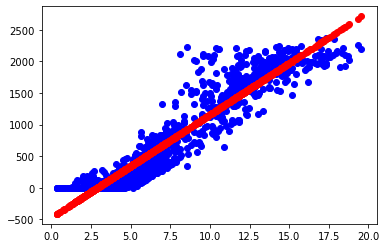

In [16]:
plt.scatter(x_train,y_train,color='blue')
plt.scatter(x_train,model.predict(x_train),color='red')

Text(0.5, 1.0, 'Energy prediction')

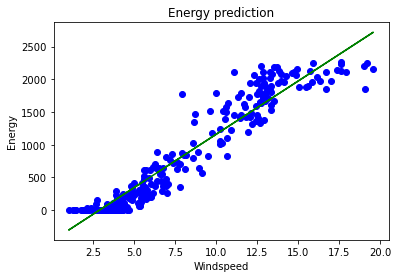

In [17]:
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,y_pred,color='green')
plt.xlabel('Windspeed')
plt.ylabel('Energy')
plt.title('Energy prediction')

In [18]:
from sklearn import metrics

In [19]:
accuracy = model.score(x_test, y_test)
print(accuracy)

0.917936860860959


In [20]:
accuracy = model.score(x_train, y_train)
print(accuracy)

0.8953034751238422


In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
x_poly = poly_reg.fit_transform(x_train)
pol_reg = LinearRegression()
pol_reg.fit(x_poly, y_train)

LinearRegression()

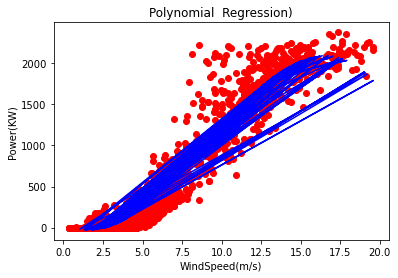

In [22]:
def viz_polymonial():
    plt.scatter(x, y, color='red')
    plt.plot(x_test, pol_reg.predict(poly_reg.fit_transform(x_test)), color='blue')
    plt.title('Polynomial  Regression)')
    plt.xlabel('WindSpeed(m/s)')
    plt.ylabel('Power(KW)')
    plt.show()
    return
viz_polymonial()

In [23]:
from sklearn import metrics

In [24]:
accuracy = pol_reg.score(x_poly, y_train)
print(accuracy)

0.9226451889558468


In [30]:
speed1=int(input("enter the wind speed"))

enter the wind speed7


In [31]:
time=int(input("enter time"))

enter time12


In [68]:
from numpy import array
from numpy import reshape
pred_list=[]
k=speed1
i=1
for i in range(72):                      
    if((time>=1)and(time<6)):
        if((speed1>4) and (speed1<8)):
            speed1+=0.75
        else:
            speed1=5.36+(i/24)*1.5
    elif((time>=6)and(time<10)):
        if((speed1>8) and (speed1<12)):
            speed1+=0.72
        else:
            speed1=11.5+(i/24)*1.75
    elif((time>=10)and(time<14)):
        if((speed1>12) and (speed1<16)):
            speed1+=0.96
        else:
            speed1=14.48+(i%24)
    elif((time>=14)and(time<16)):
        if((speed1>13)and (speed1<15)):
            speed1+=0.5
        else:
            speed1=15+(i/24)*2
            
    elif((time>=16)and(time<18)):
        if((speed1>16) and (speed1<20)):
            speed1+=1
        else:
            speed1=17.29+(i/24)*0.75
    elif((time>=18)and(time<20)):
        if((speed1>14) and (speed1<17)):
            speed1+=0.16
        else:
            speed1=16.18+(i/24)*0.5
    elif((time>=20)and(time<=23)):
        if((speed1>6) and (speed1<10)):
            speed1+=0.16
        else:
            speed1=6.42+(i/24)*1
 
  
    if(i==24) or(i==48) or(i==72):
        speed1=k+1.26+(i%24)

    speed1=array([speed1])
    speed1=speed1.reshape(speed1.shape[0],1)
    b=poly_reg.fit_transform(speed1,0)
    a=pol_reg.predict(b)
    if(a>2300):
        a=2300+i%24
    pred_list.append(abs(a))
    time=(time)+1
    if(time>24):
        time=time%24
a = []
for i in pred_list:
    #print(i[0])
    a.append(i[0][0])
# print(a)
# print(len(pred_list))    
pred_list = array(a)
# print(pred_list)
# pred_list=array(pred_list)
# pred_list


In [63]:
yy=[]
i=1
for i in range(72):
    yy.append(i)

In [64]:
print(type(yy))
yy = np.array(yy)
print(type(yy))
print(type(pred_list))

<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [65]:
print(yy.shape)
print(pred_list.shape)

(72,)
(72,)


In [66]:
print(pred_list)

[2042.45774738 2087.31401783 2041.33720274 2047.10262669 2068.58990359
 1981.92811841 2090.14622518 2091.50339949  551.07528761  582.09545774
  613.54238594  645.38460114  645.38460114  798.97902977  957.32604089
  465.31882107  608.43743366  760.35320048 1761.03791016 1772.62001052
 1784.04677694 1795.31523066 1927.5054845  2024.94037253 2091.39956059
 2061.29427891 2079.88965408 2076.53063677 2000.9610944  1854.95803279
 2089.52711924 2086.24230285  751.22139401  784.39247987  817.79362962
  851.39337221  851.39337221  734.56055278  891.33119678  760.35320048
  917.82470159  786.30017413 1990.10718743 1997.13914195 2003.94427286
 2010.51960144 2074.2550382  2090.84337693 2091.39956059 2061.29427891
 1870.00261327 1854.95803279 1630.83808623 1907.21369168 2074.07524935
 2073.09534541  961.58371006  995.67637311 1029.80240591 1063.93033737
 1063.93033737 1050.95639182 1064.28573566 1077.61051709 1090.92886029
 1104.23888943 1256.36121494 1404.26343701 1545.07775475 1675.93636727
 1829.

(72,) (72,)


Text(0.5, 1.0, 'Power generated for next 72 hours')

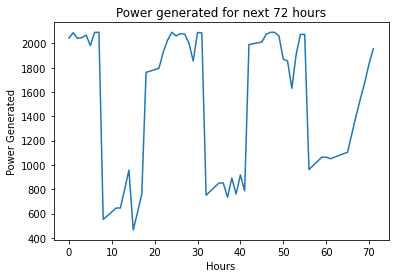

In [67]:
print(yy.shape, pred_list.shape)
plt.plot(yy,pred_list)
plt.xlabel('Hours')
plt.ylabel('Power Generated')
plt.title('Power generated for next 72 hours')